Задача: написать на Python реализацию как минимум одного алгоритма на выбор:
- любая на выбор цветовая обработка, (+)
- перевод в другое цветовое пространство (-)
- фильтрация (+)

Изображение выбрать самостоятельно.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [ ]:
img = imageio.imread('/content/20220418_083531.jpg')
print(img.shape)

(600, 800, 3)


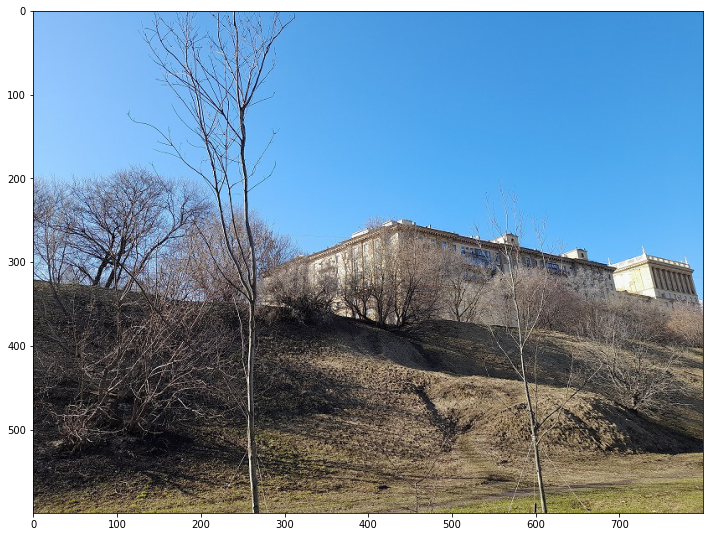

In [ ]:
plt.figure(figsize=(12, 16) )
plt.imshow(img)

In [ ]:
# фильтрация
def mean_filter(x):
  return np.mean(x)

def median_filter(x):
  return np.median(x)

In [ ]:
img_gray = img[:, : ,0].astype(np.float32) / 255

def filtrate(filter, img):

  side = int(img_gray.shape[0] * 0.01) 
  win_size = (side, side) 
  out = np.zeros(
      (img.shape[0] - win_size[0] + 1,
      img.shape[1] - win_size[1] + 1), 
      dtype=np.float32)

  for i in range(out.shape[0]):
      for j in range(out.shape[1]):
          x = img_gray[i:i+win_size[0], j:j+win_size[1]]
          out[i,j] = filter(x)

  return out

In [ ]:
out_median = filtrate(median_filter, img_gray)

out_mean = filtrate(mean_filter, img_gray)

Text(0.5, 1.0, 'median')

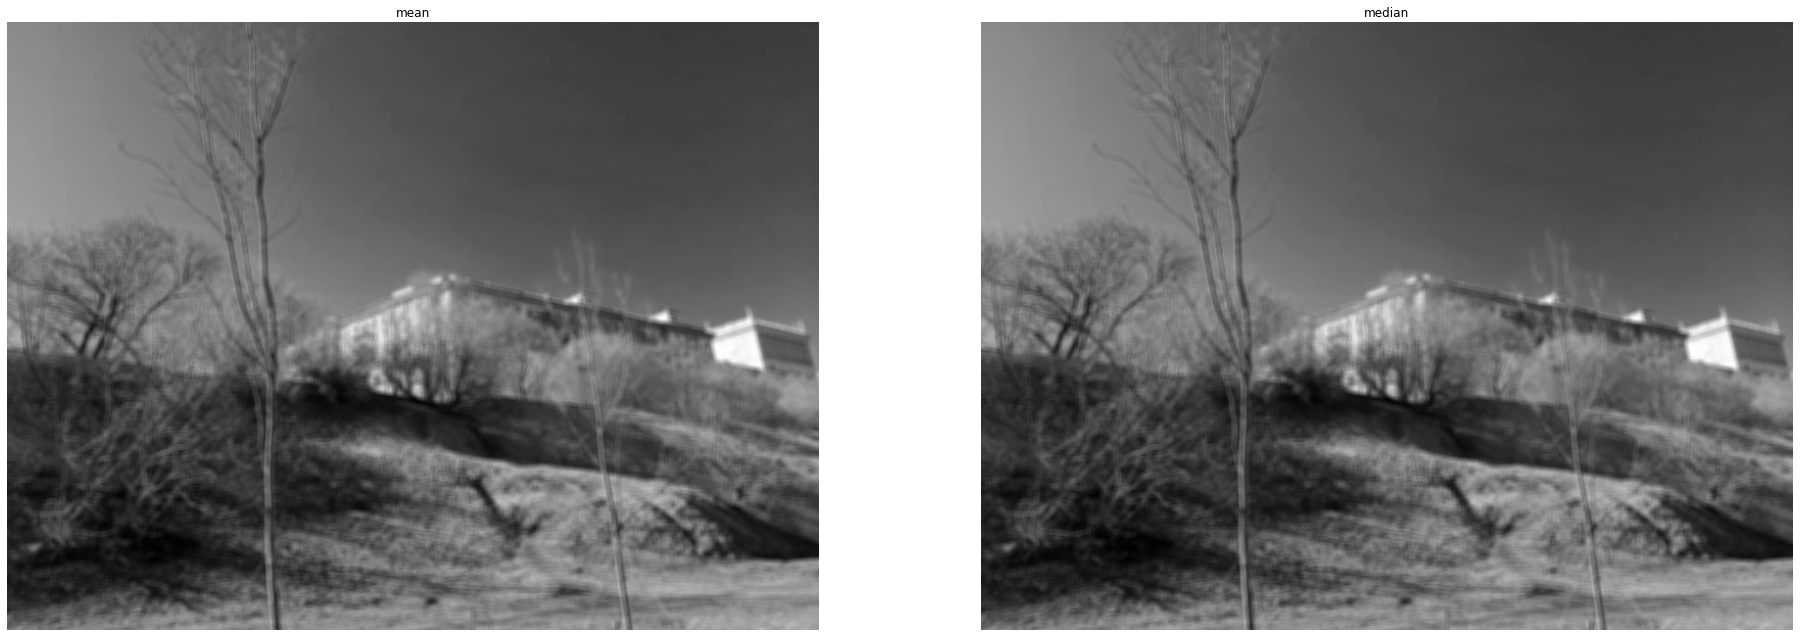

In [ ]:
fig = plt.figure(figsize=(32, 16))
 
fig.add_subplot(1, 2, 1)
plt.imshow(out_mean, cmap='gray')
plt.axis('off')
plt.title("mean")
  
fig.add_subplot(1, 2, 2)
plt.imshow(out_median, cmap='gray')
plt.axis('off')
plt.title("median")

Text(0.5, 1.0, 'pow brighter')

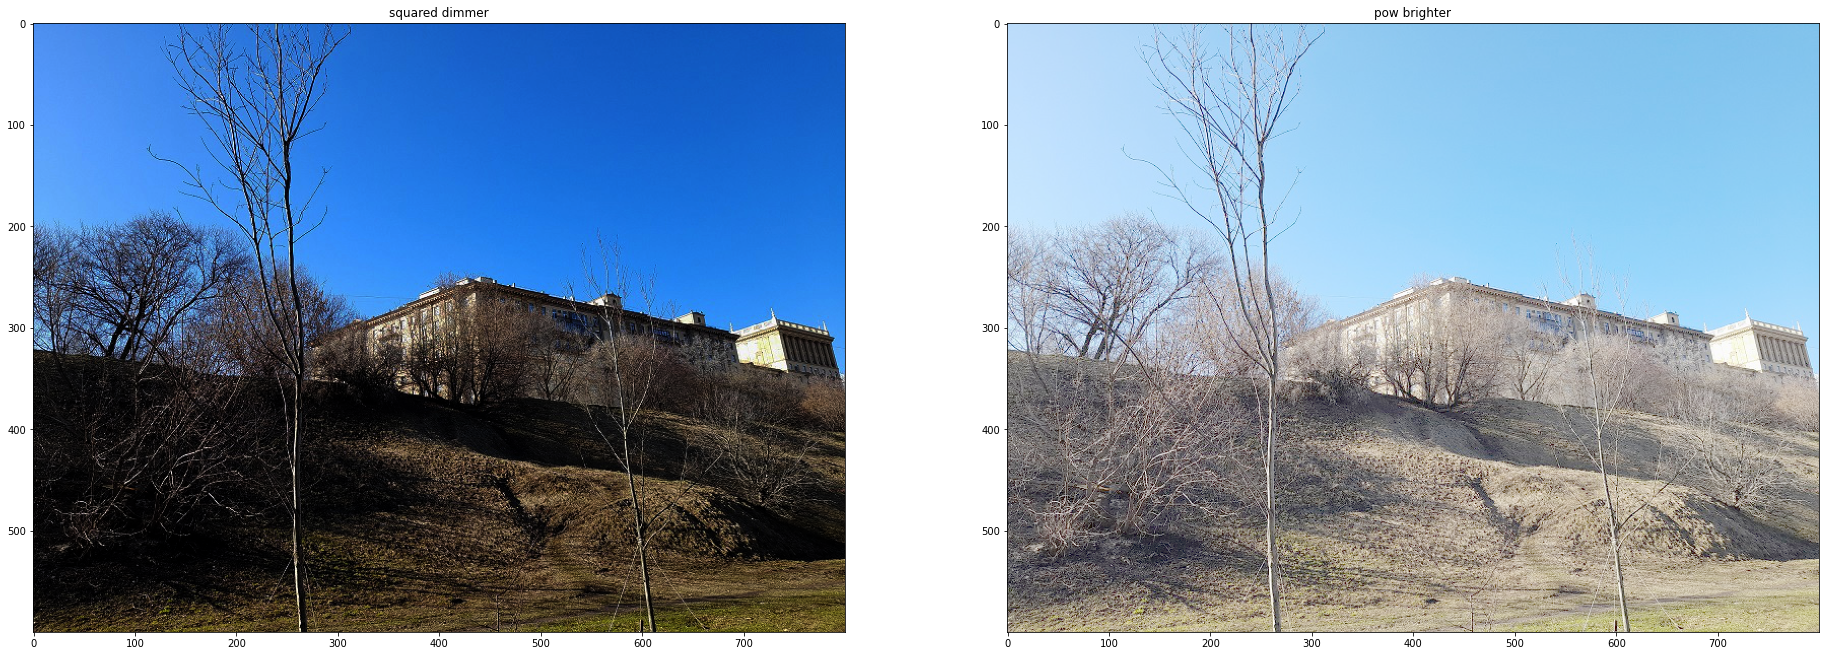

In [ ]:
# цветовая обработка
img_valid = img.astype(np.float32) / 255

fig = plt.figure(figsize=(32, 16))
 
fig.add_subplot(1, 2, 1)
plt.imshow(img_valid**1.97)
plt.title("squared dimmer")
  
fig.add_subplot(1, 2, 2)
plt.imshow(img_valid**0.5)
plt.title("pow brighter")

In [ ]:
from skimage.color import rgb2hsv, hsv2rgb

img_hsv = rgb2hsv(np.copy(img))

img_hsv_less = np.copy(img_hsv)
img_hsv_less[:, :, 1] /= 2
img_less = hsv2rgb(img_hsv_less)

img_hsv_more = np.copy(img_hsv)
img_hsv_more[:, :, 1] *= 2
img_more = hsv2rgb(img_hsv_more)

Text(0.5, 1.0, 'hsv increasing saturation')

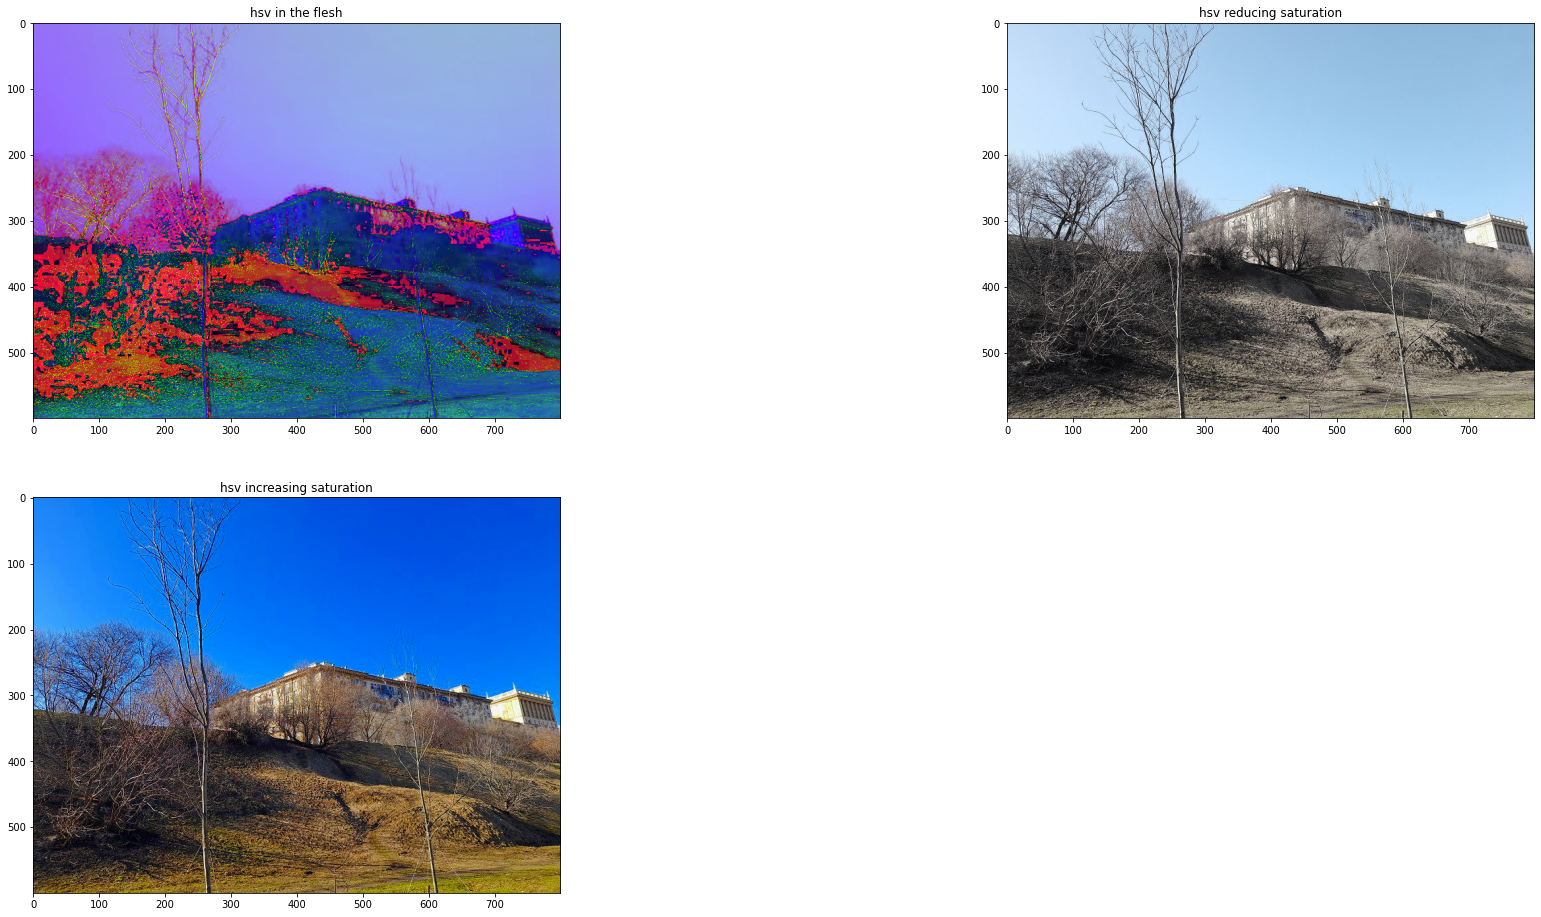

In [ ]:
fig = plt.figure(figsize=(32, 16))

fig.add_subplot(2, 2, 1)
plt.imshow(img_hsv)
plt.title('hsv in the flesh')

fig.add_subplot(2, 2, 2)
plt.imshow(img_less)
plt.title('hsv reducing saturation')

fig.add_subplot(2, 2, 3)
plt.imshow(img_more)
plt.title('hsv increasing saturation')